In [1]:
import h5py
import numpy as np
import os
import matplotlib.pyplot as plt
import os
import tensorflow as tf

2025-06-17 10:58:40.654750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750183120.671963 2055136 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750183120.677586 2055136 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750183120.694366 2055136 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750183120.694384 2055136 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750183120.694386 2055136 computation_placer.cc:177] computation placer alr

In [2]:
# minorized reference
with h5py.File('/global/u2/k/kberard/SCGSR/Research/Diamond/Data/density_tot_ref.h5', 'r') as file:
    #print("Keys: %s" % file.keys())
    ref_d = file['density'][:]
#print(ref_d)
print(ref_d.shape)
minorized_ref_d = (np.sum(ref_d,axis=2))
minorized_ref_d.shape



(64, 64, 64)


(64, 64)

In [3]:
####################################################################################################################################################
def stochastic_density(d,N):
    # poisson model
    #  accurate and fast for all values of N
    # N  = number of MC samples
    assert isinstance(d,np.ndarray)
    assert isinstance(N,(int,float,np.int64,np.float64))
    assert N>0
    ds = np.random.poisson(N*d)/N
    ds*= d.sum()/ds.sum()
    return ds
#end def stochastic_density

####################################################################################################################################################

In [4]:
print(ref_d.shape)
y_train_3d = np.zeros((5000,64,64,64))
for i in range (len(y_train_3d)):
    y_train_3d[i] =  stochastic_density(ref_d,4770000)
y_train = (np.sum(y_train_3d,axis=2))

x_train_3d = np.zeros((5000,64,64,64))
for i in range (len(x_train_3d)):
    x_train_3d[i] =  stochastic_density(ref_d,4770000)
x_train = (np.sum(x_train_3d,axis=2))

print("train generated")

(64, 64, 64)
train generated


In [5]:
print(ref_d.shape)
y_val_3d = np.zeros((1000,64,64,64))
for i in range (len(y_val_3d)):
    y_val_3d[i] =  stochastic_density(ref_d,4770000)
y_val = (np.sum(y_val_3d,axis=2))

x_val_3d = np.zeros((1000,64,64,64))
for i in range (len(x_val_3d)):
    x_val_3d[i] =  stochastic_density(ref_d,4770000)
x_val = (np.sum(x_val_3d,axis=2))
print("val generated")

(64, 64, 64)
val generated


In [6]:
print(ref_d.shape)
y_test_3d = np.zeros((500,64,64,64))
for i in range (len(y_test_3d)):
    y_test_3d[i] =  stochastic_density(ref_d,4770000)
y_test = (np.sum(y_test_3d,axis=2))

x_test_3d = np.zeros((500,64,64,64))
for i in range (len(x_test_3d)):
    x_test_3d[i] =  stochastic_density(ref_d,4770000)
x_test = (np.sum(x_test_3d,axis=2))
print("test generated")

(64, 64, 64)
test generated


In [ ]:
################## Test what number of samples #####################
"""y_tvt = stochastic_density(ref_d,4770000)
print(y_tvt.shape)
print("target error is =",np.linalg.norm(ref_d-tot_VMC_d[1]))
print("current error is =",np.linalg.norm(ref_d-y_tvt[1]))"""

In [7]:
# Add channel dimension
x_train = x_train[..., np.newaxis]
x_val   = x_val[..., np.newaxis]
x_test  = x_test[..., np.newaxis]

y_train = y_train[..., np.newaxis]
y_val   = y_val[..., np.newaxis]
y_test   = y_test[..., np.newaxis]

In [8]:
import tensorflow as tf

def jensen_shannon_divergence_loss(y_true, y_pred):
    y_t = tf.cast(y_true, tf.float32)
    y_p = tf.cast(y_pred, tf.float32)

    y_t = tf.reshape(y_t, [tf.shape(y_t)[0], -1])
    y_p = tf.reshape(y_p, [tf.shape(y_p)[0], -1])

    y_t /= tf.reduce_sum(y_t, axis=1, keepdims=True) + 1e-8
    y_p /= tf.reduce_sum(y_p, axis=1, keepdims=True) + 1e-8

    m = 0.5 * (y_t + y_p)

    kl_true = tf.reduce_sum(y_t * tf.math.log((y_t + 1e-8) / (m + 1e-8)), axis=1)
    kl_pred = tf.reduce_sum(y_p * tf.math.log((y_p + 1e-8) / (m + 1e-8)), axis=1)

    jsd = 0.5 * (kl_true + kl_pred)

    return tf.reduce_mean(jsd)


Epoch 1/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 344ms/step - loss: 0.0481 - val_loss: 0.0480
Epoch 2/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0480 - val_loss: 0.0479
Epoch 3/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0479 - val_loss: 0.0478
Epoch 4/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0477 - val_loss: 0.0477
Epoch 5/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0476 - val_loss: 0.0475
Epoch 6/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0475 - val_loss: 0.0473
Epoch 7/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0472 - val_loss: 0.0470
Epoch 8/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0469 - val_loss: 0.0466
Epoch 9/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0464 - val_loss: 0.0459
Epoch 10/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0457 - val_loss: 0.0449
Epoch 11/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0445 - val_loss: 0.0433
Epoch 12/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/st

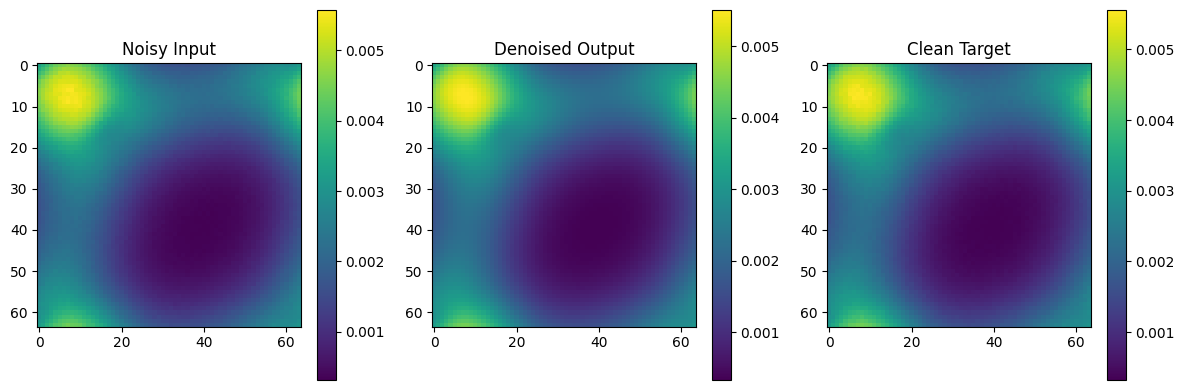

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt



# --- DAE Definition with Channel Dimension Support ---
def create_dae(input_shape):
    def renormalize(x):
        x_sum = tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True)
        x = x / (x_sum + 1e-8) * 8.0
        return x
    flat_dim = np.prod(input_shape)
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        
        # Encoder
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        
        # Decoder
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(flat_dim, activation='sigmoid'),
        layers.Reshape(target_shape=input_shape),
        layers.Lambda(renormalize)
    ])
    return model

# --- Main Execution ---
if __name__ == '__main__':
    input_shape = (64, 64, 1)


    dae = create_dae(input_shape)
    # change loss to JS div
    custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    dae.compile(optimizer=custom_optimizer, loss=jensen_shannon_divergence_loss)

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    dae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=300,
            batch_size=300,
            callbacks=[early_stop],
            verbose=1)

    # --- Predict and Evaluate ---
    i = 0
    denoised_norm = dae.predict(x_test[i:i+1])[0, ..., 0]
    denoised = denoised_norm
    noisy_input = x_test[i, ..., 0]
    true_clean = y_test

    # --- Plot ---
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(noisy_input, cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(true_clean[0,:,:,0], cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()


    
    

In [22]:
# must beat the model predicting the average
test_avg = np.mean(x_test,axis=0)
print("Mean vs DFT 2 norm diff")
print(np.linalg.norm(test_avg-minorized_ref_d))

print("prediction of one test sample vs DFT")
print(np.linalg.norm(denoised-minorized_ref_d))


Mean vs DFT 2 norm diff
0.6227441181985593
prediction of one test sample vs DFT
0.00023339280571097333


In [23]:
print(x_test[0].shape)

(64, 64, 1)


In [24]:
print(denoised)


[[0.00336309 0.00361238 0.00388408 ... 0.0029563  0.00303178 0.00316504]
 [0.0036126  0.00387807 0.00415231 ... 0.00311383 0.00321933 0.00338746]
 [0.00388395 0.00415189 0.00441536 ... 0.00330316 0.00344282 0.00363886]
 ...
 [0.00295697 0.00311471 0.00330144 ... 0.00271801 0.00276712 0.00284098]
 [0.00303037 0.00321865 0.00344288 ... 0.00276593 0.00281032 0.00289383]
 [0.00316486 0.00338545 0.00363887 ... 0.00284337 0.00289477 0.00299722]]


In [25]:
print(minorized_ref_d)

[[0.00335775 0.00360628 0.00387598 ... 0.00295353 0.00302709 0.00316002]
 [0.00360628 0.00387084 0.00414375 ... 0.00311003 0.0032154  0.00338132]
 [0.00387598 0.00414375 0.00440717 ... 0.00329726 0.00343775 0.00363325]
 ...
 [0.00295353 0.00311003 0.00329726 ... 0.00271566 0.00276405 0.00283902]
 [0.00302709 0.0032154  0.00343775 ... 0.00276405 0.00280758 0.00289073]
 [0.00316002 0.00338132 0.00363325 ... 0.00283902 0.00289073 0.00299408]]


In [26]:

y_dft = np.zeros((len(x_test),64,64))
for i in range (y_dft.shape[0]):
    y_dft[i]=minorized_ref_d
print(y_dft.shape)
#check divergence of denoised vs not denoised matrix
print("DAE JSD (denoised vs. clean):", jensen_shannon_divergence_loss(dae.predict(x_test.copy()), y_test.copy()))
print("DAE JSD (noise vs. clean):", jensen_shannon_divergence_loss(x_test.copy(), y_test.copy()))
print("DAE JSD (denoised vs. dft):", jensen_shannon_divergence_loss(dae.predict(x_test.copy()), y_dft.copy()))
print("mean:", jensen_shannon_divergence_loss(np.mean(x_test.copy(),axis=0), y_dft[0].copy()))
print()
print("DAE JSD (denoised vs. dft):", jensen_shannon_divergence_loss(np.mean(dae.predict(x_test.copy()),
                                                                            axis=0), y_dft[0].copy()))
print()
mean_pred = dae.predict(np.mean(x_test.copy(),axis=0).reshape(1,64,64,1))

                        
print("mean_out:", jensen_shannon_divergence_loss(np.squeeze(mean_pred), y_dft[0].copy()))


(500, 64, 64)
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step 
DAE JSD (denoised vs. clean): tf.Tensor(1.346352e-05, shape=(), dtype=float32)
DAE JSD (noise vs. clean): tf.Tensor(2.6859088e-05, shape=(), dtype=float32)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
DAE JSD (denoised vs. dft): tf.Tensor(2.933078e-08, shape=(), dtype=float32)
mean: tf.Tensor(3.2192585e-08, shape=(), dtype=float32)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
DAE JSD (denoised vs. dft): tf.Tensor(3.127352e-08, shape=(), dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
mean_out: tf.Tensor(4.481617e-07, shape=(), dtype=float32)


In [15]:
#nooise vs dft
# denoised vs dft
print("mean:", jensen_shannon_divergence_loss(np.mean(x_test.copy(),axis=0), y_dft[0].copy()))
print("DAE JSD (noise vs. dft):", jensen_shannon_divergence_loss(x_test.copy(), y_dft.copy()))
print("DAE JSD (denoised vs. dft):", jensen_shannon_divergence_loss(dae.predict(x_test.copy()), y_dft.copy()))


mean: tf.Tensor(3.2192585e-08, shape=(), dtype=float32)
DAE JSD (noise vs. dft): tf.Tensor(1.3419006e-05, shape=(), dtype=float32)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
DAE JSD (denoised vs. dft): tf.Tensor(6.011533e-07, shape=(), dtype=float32)


In [16]:
a = .35
x_m = np.squeeze(np.mean(x_test.copy(),axis=0))
print(x_m.shape)
print(y_dft[0].shape)
print("mean:", jensen_shannon_divergence_loss(a*x_m+(1-a)*y_dft[0], y_dft[0].copy()))
#print("mean:", jensen_shannon_divergence_loss((1-a)*np.mean(x_test.copy(),axis=0)+a*y_dft[0].copy(), y_dft[0].copy()))
print(1/a**2)

(64, 64)
(64, 64)
mean: tf.Tensor(4.1670143e-09, shape=(), dtype=float32)
8.163265306122451


In [17]:
#check the number of electrons
# need to ensure this is kept true throught taining
print("number of electron is should = 8",np.sum(denoised.sum(axis=1)))


number of electron is should = 8 8.0


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0997 - val_loss: 0.0325
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0305 - val_loss: 0.0079
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0023 - val_loss: 8.2352e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2966e-04 - val_loss: 5.8616e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6981e-04 - val_loss: 5.3128e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.2253e-04 - val_loss: 5.0066e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9559e-04 - val_loss: 4.8176e-04
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 4.7798e-04 - val_loss: 4.6721e-04
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6403e-04 - val_loss: 4.5490e-04
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5211e-04 - val_loss: 4.4395e-04
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4141e-04 - val_loss: 4.

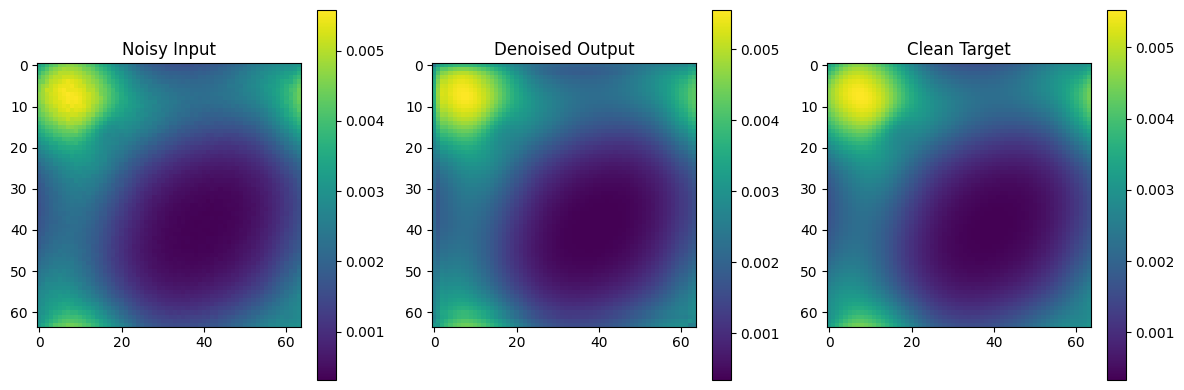

In [37]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt



def create_cae(input_shape, target_sum=8.0):
    input_layer = layers.Input(shape=input_shape)
    # Renormalize output to have a fixed sum (e.g., 8 electrons)
    def renormalize(x):
        x_sum = tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True)
        return x / (x_sum + 1e-8) * target_sum
    # Encoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
    #x = layers.Lambda(renormalize)(x)
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    #x = layers.Lambda(renormalize)(x)

    # Decoder
    x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    #x = layers.Lambda(renormalize)(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    #x = layers.Lambda(renormalize)(x)
    x = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)  # use relu to ensure non-negativity



    output_layer = layers.Lambda(renormalize)(x)

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# --- Main ---
if __name__ == '__main__':
    input_shape = (64, 64, 1)  # CAE expects 4D shape with channel

    # Create model
    cae = create_cae(input_shape)
    cae.compile(optimizer='adam', loss=jensen_shannon_divergence_loss)



    # --- Early stopping ---
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # --- Train ---
    cae.fit(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=100,
            batch_size=20,
            callbacks=[early_stop],
            verbose=1)

    # --- Predict and plot ---
    i = 0  # test sample index
    denoised_norm = cae.predict(x_test[i:i+1])[0, ..., 0]
    denoised = denoised_norm

    # --- Plot ---
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(x_test[i, ..., 0], cmap='viridis')
    plt.title("Noisy Input")
    plt.colorbar()

    plt.subplot(1, 3, 2)
    plt.imshow(denoised, cmap='viridis')
    plt.title("Denoised Output")
    plt.colorbar()

    plt.subplot(1, 3, 3)
    plt.imshow(y_test[0], cmap='viridis')
    plt.title("Clean Target")
    plt.colorbar()

    plt.tight_layout()
    plt.show()



In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

x_train_t = torch.tensor(x_train.copy(), dtype=torch.float32).permute(0, 3, 1, 2)
y_train_t = torch.tensor(y_train.copy(), dtype=torch.float32).permute(0, 3, 1, 2)
x_val_t = torch.tensor(x_val.copy(), dtype=torch.float32).permute(0, 3, 1, 2)
y_val_t = torch.tensor(y_val.copy(), dtype=torch.float32).permute(0, 3, 1, 2)
x_test_t = torch.tensor(x_test.copy(), dtype=torch.float32).permute(0, 3, 1, 2)
y_test_t = torch.tensor(y_test.copy(), dtype=torch.float32).permute(0, 3, 1, 2)


# --- Jensen-Shannon Divergence Loss ---
def jensen_shannon_divergence_loss(y_pred, y_true):
    y_pred = torch.clamp(y_pred, 1e-8, 1.0)
    y_true = torch.clamp(y_true, 1e-8, 1.0)
    print(y_pred.shape,y_true.shape)
    m = 0.5 * (y_pred + y_true)
    kl1 = torch.sum(y_true * torch.log(y_true / m), dim=(1, 2, 3))
    kl2 = torch.sum(y_pred * torch.log(y_pred / m), dim=(1, 2, 3))
    return 0.5 * (kl1 + kl2).mean()

# --- CAE with Circular Padding ---
class CAE(nn.Module):
    def __init__(self, input_channels=1, target_sum=8.0):
        super(CAE, self).__init__()
        self.target_sum = target_sum

        self.enc1 = nn.Conv2d(input_channels, 16, kernel_size=3,stride=1, padding='same', padding_mode='circular')
        self.enc2 = nn.Conv2d(16, 8, kernel_size=3,stride=1, padding='same', padding_mode='circular')
        self.dec1 = nn.Conv2d(8, 8, kernel_size=3,stride=1, padding='same', padding_mode='circular')
        self.dec2 = nn.Conv2d(8, 16, kernel_size=3,stride=1, padding='same', padding_mode='circular')
        self.dec3 = nn.Conv2d(16, 1, kernel_size=3,stride=1, padding='same', padding_mode='circular')

    def circular_pad(self, x, pad=1):
        return F.pad(x, (pad, pad, pad, pad), mode='circular')

    def renormalize(self, x):
        x_sum = x.sum(dim=(1, 2, 3), keepdim=True) + 1e-8
        return x / x_sum * self.target_sum

    def forward(self, x):
        x = self.circular_pad(x, pad=1)
        x = F.relu(self.enc1(x))

        x = self.circular_pad(x, pad=1)
        x = F.relu(self.enc2(x))

        x = self.circular_pad(x, pad=1)
        x = F.relu(self.dec1(x))

        x = self.circular_pad(x, pad=1)
        x = F.relu(self.dec2(x))

        x = self.circular_pad(x, pad=1)
        x = F.relu(self.dec3(x))

        return self.renormalize(x)


# --- Data Loaders ---
train_loader = DataLoader(TensorDataset(x_train_t, y_train_t), batch_size=20, shuffle=False)
val_loader = DataLoader(TensorDataset(x_val_t, y_val_t), batch_size=10)

# --- Model, Optimizer ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# --- Training Loop ---
best_val_loss = float('inf')
patience = 10
patience_counter = 0

for epoch in range(100):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = jensen_shannon_divergence_loss(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = jensen_shannon_divergence_loss(preds, yb)
            val_loss += loss.item()
    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.5f}, Val Loss: {val_loss:.5f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model.state_dict()
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping")
            break

# --- Evaluation ---
model.load_state_dict(best_model)
model.eval()

with torch.no_grad():
    i = 0
    input_img = x_test_t[i:i+1].to(device)
    target_img = y_test_t[i:i+1].to(device)
    output_img = model(input_img).cpu().numpy()[0, 0]
    input_img = input_img.cpu().numpy()[0, 0]
    target_img = target_img.cpu().numpy()[0, 0]

# --- Plot ---
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(input_img, cmap='viridis')
plt.title("Noisy Input")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(output_img, cmap='viridis')
plt.title("Denoised Output")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(target_img, cmap='viridis')
plt.title("Clean Target")
plt.colorbar()

plt.tight_layout()
plt.show()


torch.Size([20, 1, 74, 74]) torch.Size([20, 1, 64, 64])


RuntimeError: The size of tensor a (74) must match the size of tensor b (64) at non-singleton dimension 3

In [20]:
print(x_train.shape)
print(y_train.shape)

(765, 64, 64, 1)
(765, 64, 64, 1)


In [30]:
true_clean = y_test
# norm check after denosing and check that the norm of the denormalized y is the same as the refernce 
print(np.linalg.norm(denoised-true_clean[0,:,:,0]))
print(np.linalg.norm(true_clean[0,:,:,0]))
print(np.linalg.norm(denoised-minorized_ref_d))

#print(true_clean)
print(np.linalg.norm(y_test[0]))

0.0014868490319796819
0.1465650367842726
0.00148905437763528
0.1465650367842726


In [31]:

y_dft = np.zeros((len(x_test),64,64))

for i in range (y_dft.shape[0]):
    y_dft[i]=minorized_ref_d
print(y_dft.shape)
#check divergence of denoised vs not denoised matrix
print("DAE JSD (denoised vs. clean):", jensen_shannon_divergence_loss(cae.predict(x_test.copy()), y_test.copy()))
print("DAE JSD (noise vs. clean):", jensen_shannon_divergence_loss(x_test.copy(), y_test.copy()))
print("DAE JSD (denoised vs. dft):", jensen_shannon_divergence_loss(cae.predict(x_test.copy()), y_dft.copy()))
print("mean:", jensen_shannon_divergence_loss(np.mean(x_test.copy(),axis=0), y_dft[0].copy()))
print()
print("DAE JSD (denoised vs. dft):", jensen_shannon_divergence_loss(np.mean(cae.predict(x_test.copy()),
                                                                            axis=0), y_dft[0].copy()))
print()
mean_pred = cae.predict(np.mean(x_test.copy(),axis=0).reshape(1,64,64,1))

                        
print("mean_out:", jensen_shannon_divergence_loss(np.squeeze(mean_pred), y_dft[0].copy()))


(124, 64, 64)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step
DAE JSD (denoised vs. clean): tf.Tensor(1.4329388e-05, shape=(), dtype=float32)
DAE JSD (noise vs. clean): tf.Tensor(1.3202337e-05, shape=(), dtype=float32)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
DAE JSD (denoised vs. dft): tf.Tensor(1.4355868e-05, shape=(), dtype=float32)
mean: tf.Tensor(1.232427e-07, shape=(), dtype=float32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
DAE JSD (denoised vs. dft): tf.Tensor(1.3535374e-05, shape=(), dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
mean_out: tf.Tensor(1.3557325e-05, shape=(), dtype=float32)


In [32]:
#nooise vs dft
# denoised vs dft
print("mean:", jensen_shannon_divergence_loss(np.mean(x_test.copy(),axis=0), y_dft[0].copy()))
print("DAE JSD (noise vs. dft):", jensen_shannon_divergence_loss(x_test.copy(), y_dft.copy()))
print("DAE JSD (denoised vs. dft):", jensen_shannon_divergence_loss(cae.predict(x_test.copy()), y_dft.copy()))


mean: tf.Tensor(1.232427e-07, shape=(), dtype=float32)
DAE JSD (noise vs. dft): tf.Tensor(1.3187233e-05, shape=(), dtype=float32)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
DAE JSD (denoised vs. dft): tf.Tensor(1.4355868e-05, shape=(), dtype=float32)


In [24]:
a = .35
x_m = np.squeeze(np.mean(x_test.copy(),axis=0))
print(x_m.shape)
print(y_dft[0].shape)
print("mean:", jensen_shannon_divergence_loss(a*x_m+(1-a)*y_dft[0], y_dft[0].copy()))
#print("mean:", jensen_shannon_divergence_loss((1-a)*np.mean(x_test.copy(),axis=0)+a*y_dft[0].copy(), y_dft[0].copy()))
print(1/a**2)

(64, 64)
(64, 64)
mean: tf.Tensor(1.5119305e-08, shape=(), dtype=float32)
8.163265306122451


In [25]:
#check the number of electrons
# need to ensure this is kept true throught taining
print("number of electron is should = 8",np.sum(denoised.sum(axis=1)))


number of electron is should = 8 7.9999995


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - loss: 0.0389 - val_loss: 0.0086
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0155 - val_loss: 0.0344
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0289 - val_loss: 0.0034
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011 - val_loss: 7.4153e-04
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.7865e-04 - val_loss: 5.3012e-04
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4.9745e-04 - val_loss: 4.1876e-04
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.0251e-04 - val_loss: 3.6485e-04
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.5595e-04 - val_loss: 3.3269e-04
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.2671e-04 - val_loss: 3.1254e-04
Epoch 1

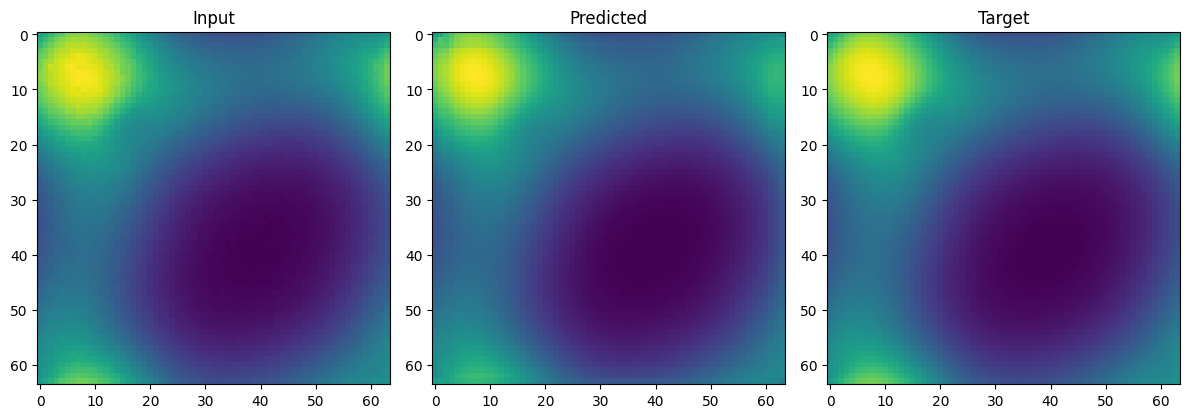

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

# --- Normalize so each sample sums to 8 ---
def normalize_to_sum_8(data):
    sums = np.sum(data, axis=(1, 2), keepdims=True)
    return data * (8.0 / (sums + 1e-8))



# --- Define rescale layer ---
def rescale_to_sum_8_layer():
    return layers.Lambda(lambda x: x * (8.0 / (tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True) + 1e-8)))

# --- Build model ---
def build_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(16, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(1, (3, 3), padding='same', activation='relu')(x)

    outputs = rescale_to_sum_8_layer()(x)

    return models.Model(inputs, outputs)

# --- Compile ---
model = build_model(input_shape=(64, 64, 1))
model.compile(optimizer='adam', loss=jensen_shannon_divergence_loss)  # or mae, or your preferred loss

# --- Callbacks ---
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- Train ---
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluate ---
loss = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")

# --- Check sum constraint ---
pred = model.predict(x_test)
sums = np.sum(pred, axis=(1, 2, 3))
print("Mean predicted sum (should be ~8):", np.mean(sums))

# --- Plot a result ---
i = 0
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(x_test[i, ..., 0], cmap='viridis')
plt.title("Input")

plt.subplot(1, 3, 2)
plt.imshow(pred[i, ..., 0], cmap='viridis')
plt.title("Predicted")

plt.subplot(1, 3, 3)
plt.imshow(y_test[i, ..., 0], cmap='viridis')
plt.title("Target")

plt.tight_layout()
plt.show()


In [17]:
true_clean = y_test
denoised = pred
# norm check after denosing and check that the norm of the denormalized y is the same as the refernce 
print(np.linalg.norm(denoised[0,:,:,0]-true_clean[0,:,:,0]))
print(np.linalg.norm(true_clean[0,:,:,0]))
print(np.linalg.norm(denoised-minorized_ref_d))

#print(true_clean)
print(np.linalg.norm(y_test[0]))
print(np.linalg.norm(denoised[0,:,:,0]))
#print(denoised)

0.0037436950220455633
0.1465650367842726
6.945063494004252
0.1465650367842726
0.14666294
